In [1]:
# Tamás Molnár
# SP - Data Processing @ UvA
# Final Project
# finalProject.ipynb

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.palettes import Category20b_20
from bokeh.io import output_notebook, show
from pandas.core.common import SettingWithCopyWarning
from bokeh.models import ColumnDataSource, CategoricalColorMapper, HoverTool


from myTools import scrapeBreakingBadRatings, scrapeHomelandRatings, scrapeMovies, scrapeSeries
from myTools import watchingHabit, mostWatchedGenre, busiestDay, mostWatchedType, mostWatchedTypeUnique, heatMapBreakingBad, heatMapHomeland, watchingHabitMinutes
from myTools import readNetflixDataset, episodePerDay, titlePerGenre, titleType, titleTypeUnique, seriesData, moviesData, concatSeriesMovies, cleanDataFrame, mapRuntime, mapGenre, mapType, addSpentMinutes

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning) 
# https://stackoverflow.com/questions/54197853/how-to-ignore-settingwithcopywarning-using-warnings-simplefilter
output_notebook()

Loading BokehJS ...

In [3]:
netflixRaw = readNetflixDataset('datasets/NetflixViewingHistory.xlsx')
netflix = netflixRaw.copy()
netflix['Date'] = pd.to_datetime(netflix['Date'])
display(netflix.head())

,Original Title,Date,Genre,Series / Movie,Title,Season,Episode title,Episode second title
0,Dark: Season 3: The Origin,2021-04-29,Drama,Series,Dark,Season 3,The Origin,None
1,Dark: Season 3: Adam and Eva,2021-04-28,Drama,Series,Dark,Season 3,Adam and Eva,None
2,Dark: Season 3: The Survivors,2021-04-28,Drama,Series,Dark,Season 3,The Survivors,None
3,Dark: Season 3: Deja-vu,2021-04-26,Drama,Series,Dark,Season 3,Deja-vu,None
4,Dark: Season 2: Endings and Beginnings,2021-04-26,Drama,Series,Dark,Season 2,Endings and Beginnings,None


In [4]:
seriesData = seriesData(netflix)
moviesData = moviesData(netflix)
concatedSeriesMovies = concatSeriesMovies(seriesData, moviesData)

# SM stands for Spent Minutes
netflixSM = cleanDataFrame(netflix)
netflixSM = mapRuntime(netflixSM, concatedSeriesMovies)
netflixSM = mapGenre(netflixSM, concatedSeriesMovies)
netflixSM = mapType(netflixSM, concatedSeriesMovies)
netflixSM = addSpentMinutes(netflixSM)

display(netflixSM.head())

,Original Title,Date,Title,Season,Episode title,Episode second title,Runtime,Genre,Series / Movie,Spent Minutes
0,The End of the F***ing World: Season 1: Episode 1,2019-01-11,The End of the F***ing World,Season 1,Episode 1,None,25,Adventure,Series,0
1,The End of the F***ing World: Season 1: Episode 2,2019-01-11,The End of the F***ing World,Season 1,Episode 2,None,25,Adventure,Series,25
2,The End of the F***ing World: Season 1: Episode 3,2019-01-11,The End of the F***ing World,Season 1,Episode 3,None,25,Adventure,Series,50
3,The End of the F***ing World: Season 1: Episode 4,2019-01-11,The End of the F***ing World,Season 1,Episode 4,None,25,Adventure,Series,75
4,The End of the F***ing World: Season 1: Episode 5,2019-01-11,The End of the F***ing World,Season 1,Episode 5,None,25,Adventure,Series,100


In [5]:
watchingHabit(netflix)
# More interactivness -> Select titles, select genres. Maybe splitted into multiple graphs.

In [6]:
watchingHabitMinutes(netflixSM)

In [7]:
busiestDay(netflixRaw)

In [8]:
mostWatchedGenre(netflix)

In [9]:
mostWatchedType(netflix)

In [10]:
mostWatchedTypeUnique(netflix)

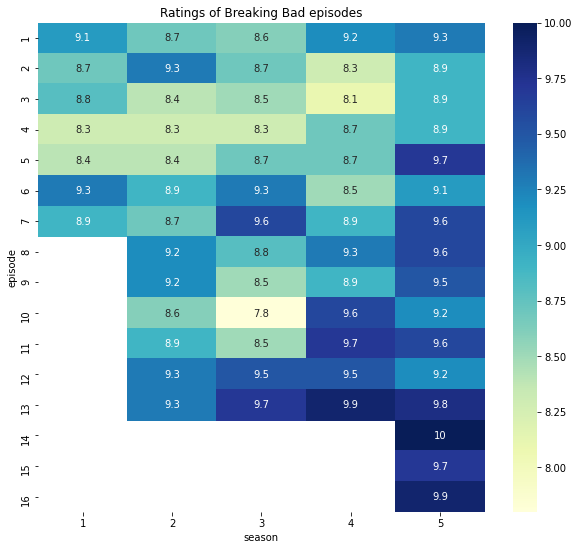

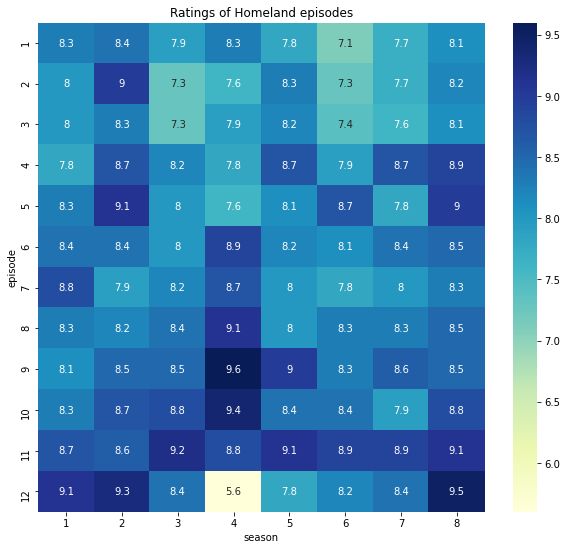

In [11]:
heatMapBreakingBad()
heatMapHomeland()

In [12]:
# ACKNOWLEDGMENT
# https://stackoverflow.com/questions/40603264/pandas-add-a-new-column-in-a-data-frame-based-on-a-value-in-another-data-frame
# THANK YOU
